<a href="https://colab.research.google.com/github/SameerGoudageri/Final-Year-Project-/blob/main/maincode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install scikit-learn==1.6.1

In [2]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import numpy as np

In [8]:
file_path = 'Min_macros_for_height_and_weight.xlsx' # Update this to the filename after uploading
data = pd.ExcelFile(file_path)

In [9]:
df = data.parse('Sheet1')

In [11]:
df.describe()

,Unnamed: 0,Height,Weight,bmi,Protein (grams/day),Carbs (grams/day),Fat (grams/day),Sugar (grams/day),Saturated Fat (grams/day)
count,100.000000,100.00000,100.000000,100.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,49.500000,165.48990,75.864600,26.975500,140.767677,307.787879,65.616162,61.626263,26.292929
std,29.011492,15.46134,24.451793,5.567527,27.458997,60.067356,12.827511,12.001348,5.163159
min,0.000000,140.18000,30.810000,14.200000,92.000000,202.000000,43.000000,40.000000,17.000000
25%,24.750000,151.03000,52.757500,22.497500,115.000000,251.000000,53.500000,50.000000,21.000000
50%,49.500000,163.10500,78.030000,28.785000,143.000000,313.000000,67.000000,63.000000,27.000000
75%,74.250000,180.52250,101.375000,31.342500,170.500000,373.000000,79.500000,74.500000,32.000000
max,99.000000,189.28000,109.730000,38.560000,180.000000,394.000000,84.000000,79.000000,34.000000


In [12]:
df.isnull()

,Unnamed: 0,Height,Weight,bmi,bmi_range,Protein (grams/day),Carbs (grams/day),Fat (grams/day),Sugar (grams/day),Saturated Fat (grams/day),Food Energy (Calories/day)
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False


In [13]:
input_features = ['Height', 'Weight', 'Food Energy (Calories/day)']
output_features = ['Protein (grams/day)', 'Carbs (grams/day)', 'Fat (grams/day)', 'Sugar (grams/day)']

In [14]:
df['Food Energy (Calories/day)'] = df['Food Energy (Calories/day)'].astype(str)  # Convert to string
df['Food Energy (Calories/day)'] = df['Food Energy (Calories/day)'].str.replace(',', '').astype(float)

In [15]:
missing_inputs = df[input_features].isnull().sum()
missing_outputs = df[output_features].isnull().sum()

print("Missing values in input features:\n", missing_inputs)
print("Missing values in output features:\n", missing_outputs)

# Drop rows with missing values (or you can impute them as needed)
df = df.dropna(subset=input_features + output_features)

Missing values in input features:
 Height                        0
Weight                        0
Food Energy (Calories/day)    1
dtype: int64
Missing values in output features:
 Protein (grams/day)    1
Carbs (grams/day)      1
Fat (grams/day)        1
Sugar (grams/day)      1
dtype: int64


In [16]:
missing_after_dropping = df.isnull().sum()
print("Missing values after dropping rows:\n", missing_after_dropping)

Missing values after dropping rows:
 Unnamed: 0                    0
Height                        0
Weight                        0
bmi                           0
bmi_range                     0
Protein (grams/day)           0
Carbs (grams/day)             0
Fat (grams/day)               0
Sugar (grams/day)             0
Saturated Fat (grams/day)     0
Food Energy (Calories/day)    0
dtype: int64


In [17]:
X = df[input_features]
y = df[output_features]

In [18]:
# Standardize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

input_data = df[input_features].values

input_df = pd.DataFrame(input_data, columns=input_features)

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Now transform using the fitted scaler
input_scaled = scaler_X.transform(input_df)

In [19]:
import joblib
joblib.dump(scaler_X, 'scaler_X.pkl')
joblib.dump(scaler_y, 'scaler_y.pkl')

['scaler_y.pkl']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [21]:
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [22]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.0020657625153344297
R^2 Score: 0.9975326438421872


In [23]:
def predict_nutrition(height, weight, calories):
    # Scale the input
    input_data = np.array([[height, weight, calories]])
    input_scaled = scaler_X.transform(input_data)

    # Predict using the trained model
    prediction_scaled = model.predict(input_scaled)

    # Inverse scale the output
    prediction = scaler_y.inverse_transform(prediction_scaled)
    return {
        'Protein (grams/day)': prediction[0][0],
        'Carbs (grams/day)': prediction[0][1],
        'Fat (grams/day)': prediction[0][2],
        'Sugar (grams/day)': prediction[0][3],
    }

In [24]:
example_input = {'Height': 182, 'Weight': 69, 'Calories': 3000}
result = predict_nutrition(example_input['Height'], example_input['Weight'], example_input['Calories'])
print("\nNutritional Recommendations for Input:", example_input)
print(result)


Nutritional Recommendations for Input: {'Height': 182, 'Weight': 69, 'Calories': 3000}
{'Protein (grams/day)': np.float64(165.32), 'Carbs (grams/day)': np.float64(361.28999999999996), 'Fat (grams/day)': np.float64(77.06), 'Sugar (grams/day)': np.float64(72.36)}


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [25]:
example_input = {'Height': 101, 'Weight': 43, 'Calories': 2000}
result = predict_nutrition(example_input['Height'], example_input['Weight'], example_input['Calories'])
print(result)

{'Protein (grams/day)': np.float64(121.03000000000002), 'Carbs (grams/day)': np.float64(265.59999999999997), 'Fat (grams/day)': np.float64(56.6), 'Sugar (grams/day)': np.float64(53.370000000000005)}


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [26]:
nutritional_recommendations = [
    result['Protein (grams/day)'],
    result['Carbs (grams/day)'],
    result['Fat (grams/day)'],
    result['Sugar (grams/day)']
]

# Display the result
print("\nNutritional Recommendations for Input:", example_input)
print(result)
print("\nNutritional Recommendations List:", nutritional_recommendations)


Nutritional Recommendations for Input: {'Height': 101, 'Weight': 43, 'Calories': 2000}
{'Protein (grams/day)': np.float64(121.03000000000002), 'Carbs (grams/day)': np.float64(265.59999999999997), 'Fat (grams/day)': np.float64(56.6), 'Sugar (grams/day)': np.float64(53.370000000000005)}

Nutritional Recommendations List: [np.float64(121.03000000000002), np.float64(265.59999999999997), np.float64(56.6), np.float64(53.370000000000005)]


In [27]:
print(result)

{'Protein (grams/day)': np.float64(121.03000000000002), 'Carbs (grams/day)': np.float64(265.59999999999997), 'Fat (grams/day)': np.float64(56.6), 'Sugar (grams/day)': np.float64(53.370000000000005)}


In [28]:
import joblib

# Save the trained Random Forest Regressor model
rf_model_filename = "random_forest_regressor.pkl"
joblib.dump(model, rf_model_filename)

print(f"Model saved as {rf_model_filename}")

Model saved as random_forest_regressor.pkl


In [29]:
protein = result['Protein (grams/day)']
fat = result['Fat (grams/day)']
carbs = result['Carbs (grams/day)']

In [35]:
file_path = 'Food_data_generated_with_dietIDs.csv'
food_data = pd.read_csv(file_path, encoding='latin1')

In [37]:
food_data.head()

,Unnamed: 0,dietID,Food_name,Protein(g),Total lipid (fat)(g),"Carbohydrate, by difference(g)",Energy(kcal),"Alcohol, ethyl(g)",Water(g),Caffeine(mg),...,PUFA 20:4(g),PUFA 22:6 n-3 (DHA)(g),MUFA 16:1(g),PUFA 18:4(g),MUFA 20:1(g),PUFA 20:5 n-3 (EPA)(g),MUFA 22:1(g),PUFA 22:5 n-3 (DPA)(g),"Fatty acids, total monounsaturated(g)","Fatty acids, total polyunsaturated(g)"
0,0,1005,Idli,6.36,0.35,25.0,128,0,67.2,0,...,0.000,0.0,0.001,0.0,0.002,0.0,0.000,0.0,0.09,0.142
1,1,1003,"Dosa, plain",5.70,4.05,37.0,210,0,51.8,0,...,0.000,0.0,0.014,0.0,0.027,0.0,0.003,0.0,1.59,1.610
2,2,1005,"Dosa, with filling",5.46,4.27,30.8,184,0,57.9,0,...,0.000,0.0,0.014,0.0,0.026,0.0,0.002,0.0,1.61,1.720
3,3,1005,"Bread, puri",6.84,24.90,39.2,409,0,28.0,0,...,0.001,0.0,0.083,0.0,0.167,0.0,0.000,0.0,9.71,10.000
4,4,1001,Vada,12.80,9.73,33.2,266,0,42.0,0,...,0.000,0.0,0.034,0.0,0.066,0.0,0.000,0.0,3.81,3.950


In [38]:
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 68 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             145 non-null    int64  
 1   dietID                                 145 non-null    int64  
 2   Food_name                              145 non-null    object 
 3   Protein(g)                             145 non-null    float64
 4   Total lipid (fat)(g)                   145 non-null    float64
 5   Carbohydrate, by difference(g)         145 non-null    float64
 6   Energy(kcal)                           145 non-null    int64  
 7   Alcohol, ethyl(g)                      145 non-null    int64  
 8   Water(g)                               145 non-null    float64
 9   Caffeine(mg)                           145 non-null    int64  
 10  Theobromine(mg)                        145 non-null    int64  
 11  Sugars

In [40]:
# Extract relevant input features (protein, fat, carbs) and output columns (food names and nutritional content)
# Input features
input_features = food_data[['Protein(g)', 'Total lipid (fat)(g)', 'Carbohydrate, by difference(g)']]

# Extract food names (assuming the Food_name column is the correct one)
food_names = food_data['Food_name']

# Combine extracted columns for clarity and processing
selected_data = pd.concat([input_features, food_names], axis=1)

# Check for missing values and overall integrity
selected_data.info(), selected_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Protein(g)                      145 non-null    float64
 1   Total lipid (fat)(g)            145 non-null    float64
 2   Carbohydrate, by difference(g)  145 non-null    float64
 3   Food_name                       145 non-null    object 
dtypes: float64(3), object(1)
memory usage: 4.7+ KB


(None,
    Protein(g)  Total lipid (fat)(g)  Carbohydrate, by difference(g)  \
 0        6.36                  0.35                            25.0   
 1        5.70                  4.05                            37.0   
 2        5.46                  4.27                            30.8   
 3        6.84                 24.90                            39.2   
 4       12.80                  9.73                            33.2   
 
             Food_name  
 0                Idli  
 1         Dosa, plain  
 2  Dosa, with filling  
 3         Bread, puri  
 4                Vada  )

In [41]:
for column in ["proteing", "total_lipid_fatg", "carbohydrate,_by_differenceg", "waterg"]:
    if column in input_features.columns:
        mean_value = input_features[column][input_features[column] >= 0].mean()
        input_features[column] = input_features[column].apply(lambda x: mean_value if x < 0 else x)

# Special handling for "waterg" column
if "waterg" in input_features.columns:
    mean_value_waterg = input_features["waterg"].dropna().mean()
    input_features["waterg"] = input_features["waterg"].apply(lambda x: mean_value_waterg if pd.isna(x) or x < 0 else x)

X = input_features.to_numpy()

In [43]:
# Create a model using Nearest Neighbors for recommendation
nn_model = NearestNeighbors(n_neighbors=5, metric='euclidean')
nn_model.fit(X)

NearestNeighbors(metric='euclidean')

In [46]:
def recommend_foods(protein, fat, carbs, model, food_names_df, input_features_df):
    # Input as a vector
    input_vector = np.array([[protein, fat, carbs]])
    distances, indices = model.kneighbors(input_vector)
    recommendations = []
    for idx in indices[0]:
        # Correctly access the food name from the Series using the index
        food_name = food_names_df.iloc[idx]
        # Ensure the index exists in input_features_df before accessing
        if idx in input_features_df.index:
            nutrition_data = input_features_df.iloc[idx]
            recommendations.append({
                "food_name": food_name,
                "protein": nutrition_data["Protein(g)"], # Use correct column name
                "fat": nutrition_data["Total lipid (fat)(g)"], # Use correct column name
                "carbs": nutrition_data["Carbohydrate, by difference(g)"], # Use correct column name
                # Assuming 'waterg' exists and is a valid column in input_features_df if needed
                # If 'waterg' is not in input_features_df, you might need to get it from the original food_data
                "water": f"{random.uniform(2, 3):.2f}L"  # Include water if available
            })
    return pd.DataFrame(recommendations).to_dict()

In [48]:
sample_recommendations = recommend_foods(protein, fat, carbs, nn_model, food_names, input_features)
sample_recommendations

{'food_name': {0: 'Rice cake',
  1: 'Cereal or granola bar, with rice cereal',
  2: "Cereal, O's, multigrain",
  3: 'Snack bar, oatmeal',
  4: 'Cookie, oatmeal'},
 'protein': {0: 7.1, 1: 3.4, 2: 8.54, 3: 6.67, 4: 6.2},
 'fat': {0: 4.3, 1: 9.0, 2: 3.76, 3: 6.67, 4: 18.1},
 'carbs': {0: 81.1, 1: 80.5, 2: 76.2, 3: 75.5, 4: 68.7},
 'water': {0: '2.49L', 1: '2.65L', 2: '2.57L', 3: '2.27L', 4: '2.70L'}}

In [50]:
accuracy = accuracy_score(actual_food_indices, predicted_food_indices)
mse = mean_squared_error(actual_food_indices, predicted_food_indices)
r2 = r2_score(actual_food_indices, predicted_food_indices)

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:557: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

In [51]:
import joblib

# Save the trained NearestNeighbors model
model_filename = "nearest_neighbors_model.pkl"
joblib.dump(nn_model, model_filename)

print(f"Model saved as {model_filename}")

Model saved as nearest_neighbors_model.pkl


In [52]:
file_path = 'Min_macros_for_height_and_weight.xlsx'
bmi_data = pd.read_excel(file_path, sheet_name='Sheet1')

In [53]:
bmi_data.rename(columns=lambda x: x.strip(), inplace=True)  # Remove extra spaces in column names
if 'Food Energy (Calories/day)' in bmi_data.columns and bmi_data['Food Energy (Calories/day)'].dtype == 'object':
    bmi_data['Food Energy (Calories/day)'] = bmi_data['Food Energy (Calories/day)'].str.replace(',', '').astype(float)

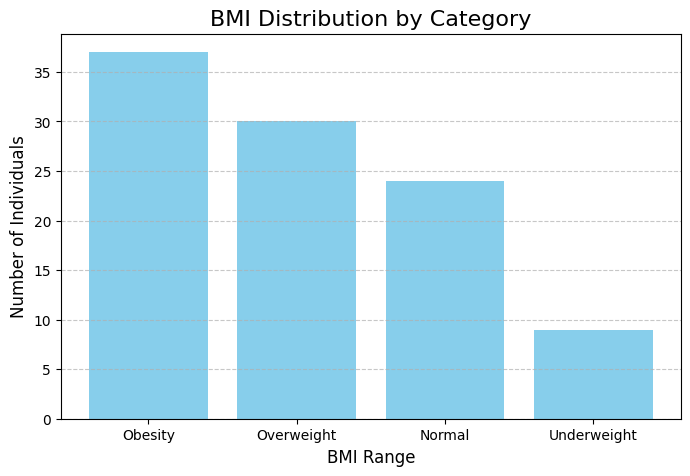

In [54]:
if 'bmi_range' in bmi_data.columns:
    # Plot 1: BMI Distribution by Category
    bmi_counts = bmi_data['bmi_range'].value_counts()
    plt.figure(figsize=(8, 5))
    plt.bar(bmi_counts.index, bmi_counts.values, color='skyblue')
    plt.title('BMI Distribution by Category', fontsize=16)
    plt.xlabel('BMI Range', fontsize=12)
    plt.ylabel('Number of Individuals', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Column 'bmi_range' not found in the dataset.")

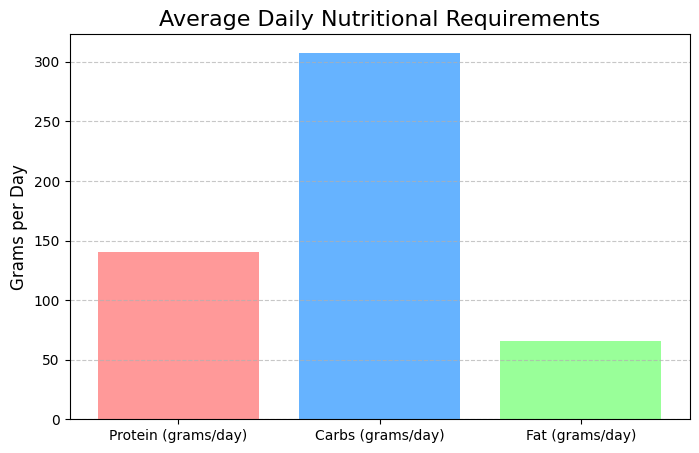

In [55]:
categories = ['Protein (grams/day)', 'Carbs (grams/day)', 'Fat (grams/day)']
valid_categories = [col for col in categories if col in bmi_data.columns]
if valid_categories:
    mean_values = bmi_data[valid_categories].mean()

    plt.figure(figsize=(8, 5))
    plt.bar(mean_values.index, mean_values.values, color=['#ff9999', '#66b3ff', '#99ff99'])
    plt.title('Average Daily Nutritional Requirements', fontsize=16)
    plt.ylabel('Grams per Day', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("No valid nutritional requirement columns found in the dataset.")

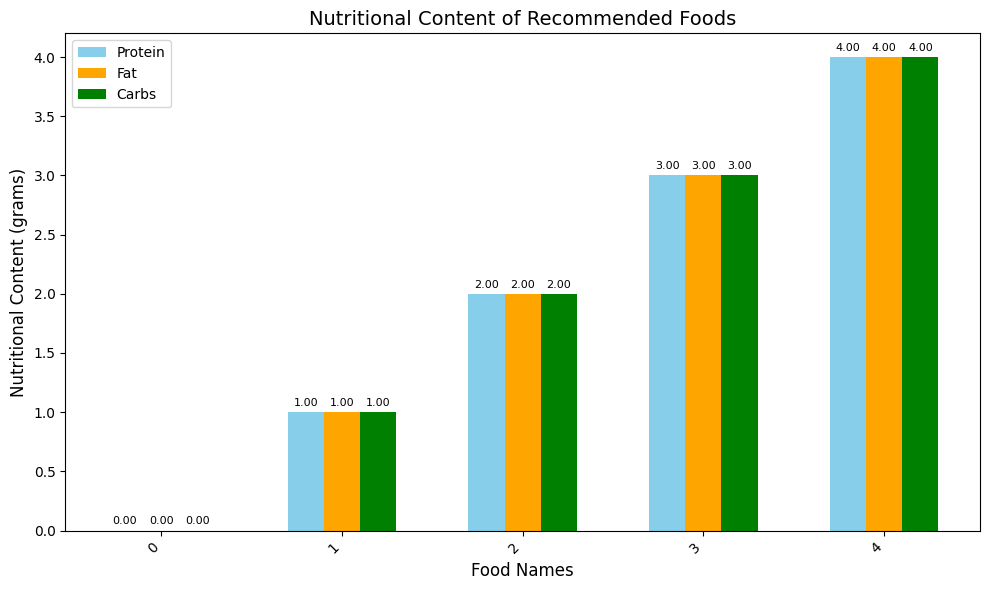

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `sample_recommendations` is the DataFrame shown in the image
# Extract data
food_names = sample_recommendations['food_name']
protein = sample_recommendations['protein']
fat = sample_recommendations['fat']
carbs = sample_recommendations['carbs']

# Bar chart to visualize Protein, Fat, and Carbs content
x = np.arange(len(food_names))  # Food indices
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, protein, width, label='Protein', color='skyblue')
bars2 = ax.bar(x, fat, width, label='Fat', color='orange')
bars3 = ax.bar(x + width, carbs, width, label='Carbs', color='green')

# Adding labels and title
ax.set_xlabel('Food Names', fontsize=12)
ax.set_ylabel('Nutritional Content (grams)', fontsize=12)
ax.set_title('Nutritional Content of Recommended Foods', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(food_names, rotation=45, ha='right', fontsize=10)
ax.legend()

# Adding value labels on top of bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

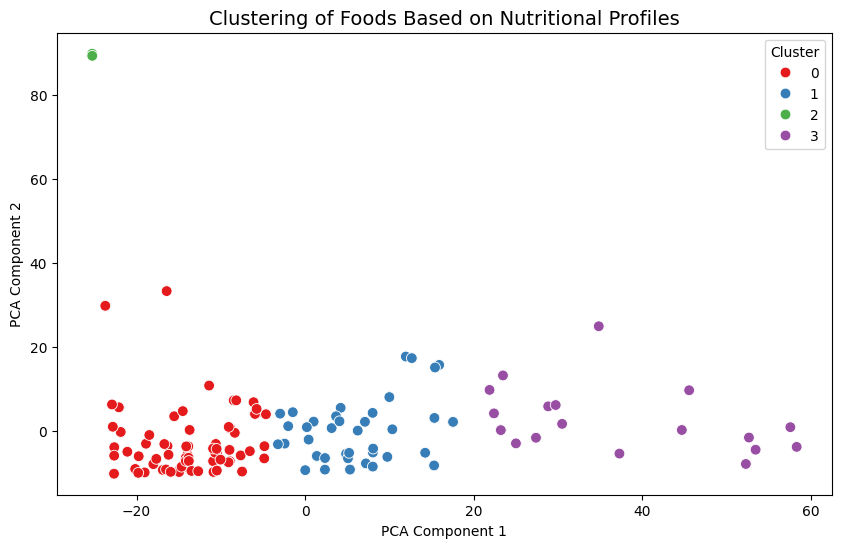

In [58]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10) # Added n_init for newer sklearn versions
input_features_cleaned = input_features[['Protein(g)', 'Total lipid (fat)(g)', 'Carbohydrate, by difference(g)']].dropna()
kmeans.fit(input_features_cleaned)
clusters = kmeans.labels_

# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(input_features_cleaned)

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=clusters, palette="Set1", s=60)
plt.title("Clustering of Foods Based on Nutritional Profiles", fontsize=14)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

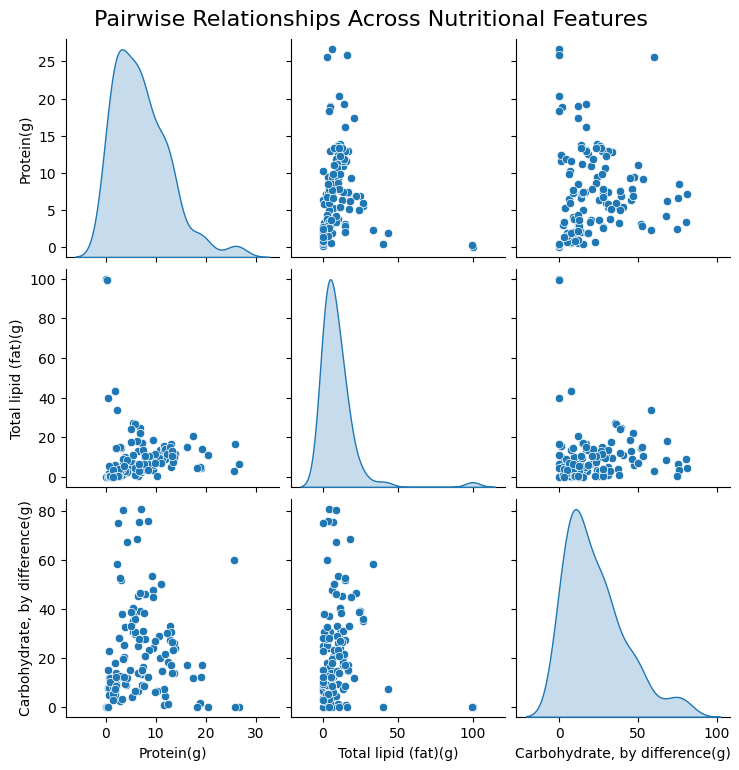

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot for protein, fat, carbs
sns.pairplot(input_features[['Protein(g)', 'Total lipid (fat)(g)', 'Carbohydrate, by difference(g)']].dropna(),
             diag_kind="kde",
             kind="scatter",
             height=2.5)
plt.suptitle("Pairwise Relationships Across Nutritional Features", y=1.02, fontsize=16)
plt.show()

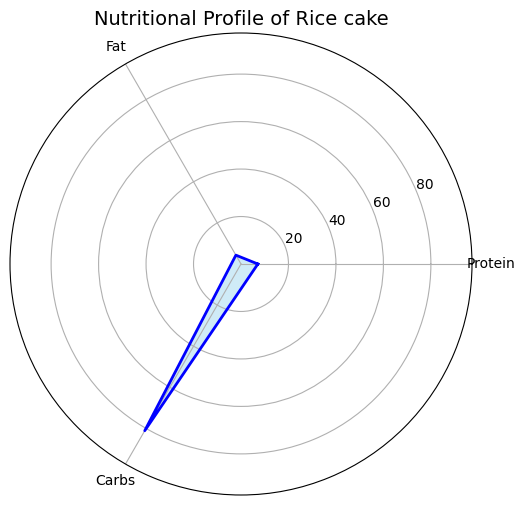

In [64]:
from math import pi

# Select one food for visualization
# Access data from the dictionary for the first recommended food (index 0)
food_name_to_plot = sample_recommendations['food_name'][0]
protein_to_plot = sample_recommendations['protein'][0]
fat_to_plot = sample_recommendations['fat'][0]
carbs_to_plot = sample_recommendations['carbs'][0]
water_to_plot = sample_recommendations['water'][0] # Assuming 'water' key exists and is relevant for plotting

# Radar chart setup
categories = ['Protein', 'Fat', 'Carbs', 'Water']
values = [protein_to_plot, fat_to_plot, carbs_to_plot]

# Convert water string to float for plotting if necessary, or handle as a separate visual element
# For this radar chart, let's exclude water as it's in a different unit and format.
# If you need to include water, you might need a different visualization or unit conversion.
categories = ['Protein', 'Fat', 'Carbs']
values = [protein_to_plot, fat_to_plot, carbs_to_plot]


values += values[:1]  # Close the radar chart
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='skyblue', alpha=0.4)
ax.plot(angles, values, color='blue', linewidth=2)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_title(f"Nutritional Profile of {food_name_to_plot}", fontsize=14)
# Set limits for each axis to ensure consistent scaling across different food items
ax.set_ylim(0, max(values) * 1.2) # Adjust limit based on the max value to make plot readable
ax.grid(True)

plt.show()

### Analysis Summary and Insights

We have successfully completed the following steps:

1.  **Data Loading and Preprocessing:** Loaded and cleaned the data for both macronutrient prediction based on height and weight, and the food items dataset.
2.  **Macronutrient Prediction:** Trained a Random Forest Regressor model to predict protein, carbs, fat, and sugar requirements based on user input.
3.  **Food Recommendation:** Utilized a Nearest Neighbors model to recommend food items from the dataset that have macronutrient profiles similar to the predicted requirements.
4.  **Data Visualization:** Generated several visualizations to understand the data and results:
    *   BMI distribution and average nutritional requirements from the height and weight data.
    *   A bar chart showing the nutritional content of the recommended food items.
    *   A clustering plot (using K-Means and PCA) to group food items by their nutritional profiles.
    *   A pairplot to visualize the pairwise relationships between protein, fat, and carbohydrate content in the food data.

**Key Insights from Visualizations:**

*   The BMI distribution shows the prevalence of different BMI categories in the height and weight dataset.
*   The average nutritional requirements provide a general understanding of macronutrient needs in the dataset.
*   The bar chart of recommended foods allows for a direct comparison of the macronutrient breakdown of the suggested items.
*   The clustering plot reveals potential groupings of food items with similar nutritional characteristics, which can be useful for understanding dietary patterns.
*   The pairplot shows the correlations and distributions of protein, fat, and carbohydrate content, highlighting any strong relationships or patterns between these macronutrients in the food dataset.

Overall, this analysis provides a framework for personalized nutritional recommendations by combining predicted macronutrient needs with a database of food items and their nutritional content. The visualizations help in understanding both the input data and the characteristics of the recommended foods.

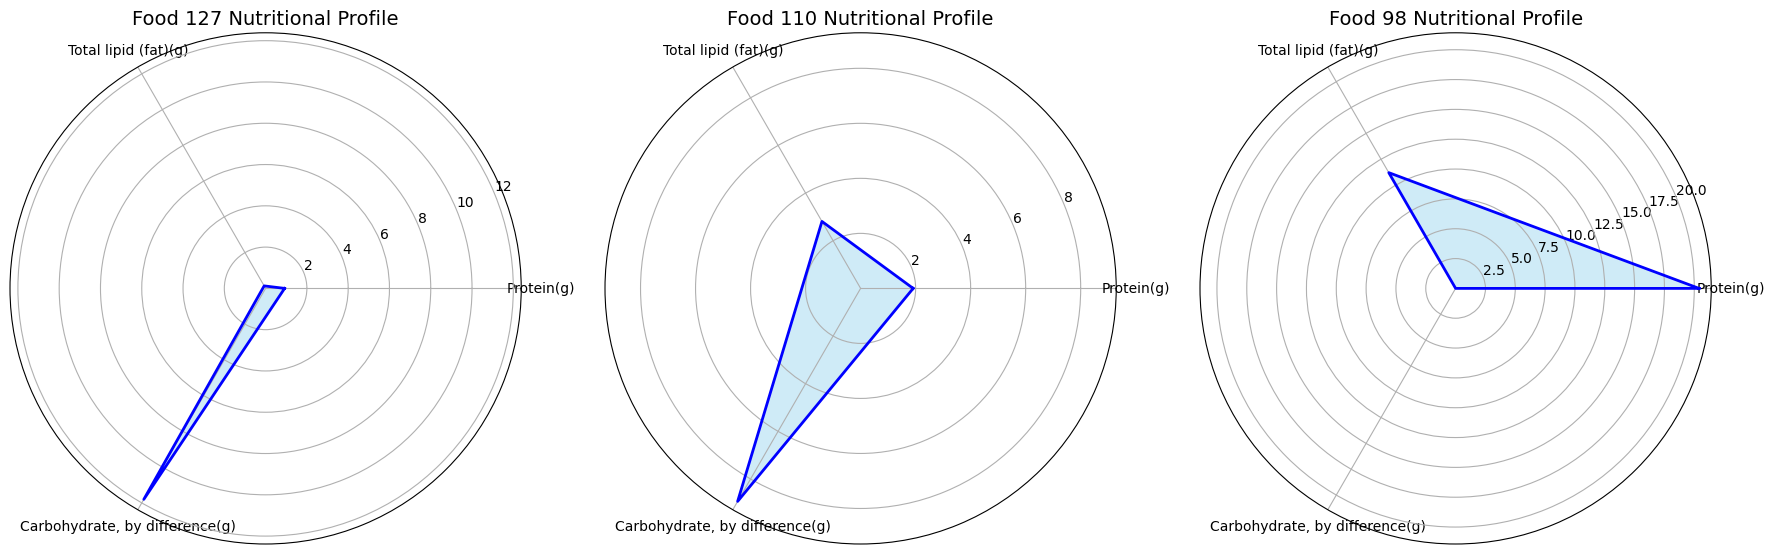

In [65]:
from math import pi

# Select multiple foods for visualization
selected_data = input_features.sample(3)  # Randomly sample 3 foods
categories = ['Protein(g)', 'Total lipid (fat)(g)', 'Carbohydrate, by difference(g)']

# Create radar charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw=dict(polar=True))
for i, (idx, row) in enumerate(selected_data.iterrows()):
    values = row[categories].values.tolist()
    values += values[:1]  # Close the radar chart
    angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
    angles += angles[:1]

    ax = axes[i]
    ax.fill(angles, values, color='skyblue', alpha=0.4)
    ax.plot(angles, values, color='blue', linewidth=2)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_title(f"Food {idx} Nutritional Profile", fontsize=14)

plt.tight_layout()
plt.show()

In [66]:
# Load the dataset
file_path = 'Food_data_generated_with_dietIDs.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

In [67]:
X = data[['Protein(g)', 'Total lipid (fat)(g)', 'Carbohydrate, by difference(g)']]
y = data['Food_name']

In [68]:
# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

features = data[['Protein(g)', 'Total lipid (fat)(g)', 'Carbohydrate, by difference(g)']]

# Scale the features (important for nearest neighbor)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [69]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [70]:
model = NearestNeighbors(n_neighbors=5)
model.fit(scaled_features)

NearestNeighbors()

In [72]:
# Use the predicted macronutrient values from the 'result' dictionary as input
input_protein = result['Protein (grams/day)']
input_fat = result['Fat (grams/day)']
input_carbs = result['Carbs (grams/day)']

input_data = [[input_protein, input_fat, input_carbs]]  # Use the numerical values

# Scale the input data using the scaler fitted on the food features
input_scaled = scaler.transform(input_data)

distances, indices = model.kneighbors(input_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [73]:
def evaluate_model(model, X_test, y_test):
    """
    Evaluate the model using indices and distances score
    """
    # Print results
    print("Nearest Neighbors (Indexes):", indices)
    print("Distances to Neighbors:", distances)

In [74]:
evaluate_model(model, X_test, y_test)

Nearest Neighbors (Indexes): [[ 32  96  39  46 137]]
Distances to Neighbors: [[20.91959393 22.51442513 22.52095037 22.96844542 23.18802585]]


In [75]:
import joblib

# Save the trained NearestNeighbors model
model_filename = "chatbot-model.pkl"
joblib.dump(model, model_filename)

print(f"Model saved as {model_filename}")

Model saved as chatbot-model.pkl


In [76]:
def recommend_diet_plan(protein_target, fat_target, carbs_target, data, top_n=3):
    # Extract relevant columns
    food_items = data[['Food_name', 'Protein(g)', 'Total lipid (fat)(g)', 'Carbohydrate, by difference(g)']].dropna()

    # Rename columns for ease
    food_items.columns = ["food_name", "protein", "fat", "carbs"]

    # Convert to numpy array for faster computation
    food_array = food_items[["protein", "fat", "carbs"]].values
    food_names = food_items["food_name"].values

    best_combinations = []

    for _ in range(top_n):  # Generate multiple different meal plans
        selected_indices = []
        current_protein, current_fat, current_carbs = 0, 0, 0
        meal_plan = []

        while (current_protein < protein_target or current_fat < fat_target or current_carbs < carbs_target) and len(meal_plan) < 5:
            idx = random.randint(0, len(food_array) - 1)

            # Prevent selecting the same food repeatedly
            if idx in selected_indices:
                continue

            selected_indices.append(idx)
            meal_plan.append({
                "food_name": food_names[idx],
                "protein": food_array[idx][0],
                "fat": food_array[idx][1],
                "carbs": food_array[idx][2]
            })

            # Update macro totals
            current_protein += food_array[idx][0]
            current_fat += food_array[idx][1]
            current_carbs += food_array[idx][2]

            # Stop if we reach the macro targets or 5 items
            if (current_protein >= protein_target and current_fat >= fat_target and current_carbs >= carbs_target) or len(meal_plan) == 5:
                best_combinations.append({
                    "meals": meal_plan,
                    "total_protein": current_protein,
                    "total_fat": current_fat,
                    "total_carbs": current_carbs,
                    "recommendation": "Balanced meal based on your macro needs!"
                })
                break  # Move to the next diet plan

    return best_combinations

In [78]:
recommendations = recommend_diet_plan(result['Protein (grams/day)'], result['Fat (grams/day)'], result['Carbs (grams/day)'], data, top_n=3)
print(recommendations)

[{'meals': [{'food_name': 'Pepper steak', 'protein': np.float64(11.9), 'fat': np.float64(9.12), 'carbs': np.float64(4.34)}, {'food_name': 'Rice, fried, with beef', 'protein': np.float64(7.86), 'fat': np.float64(4.06), 'carbs': np.float64(27.6)}, {'food_name': 'Samosa', 'protein': np.float64(5.11), 'fat': np.float64(17.4), 'carbs': np.float64(33.1)}, {'food_name': 'Avocado, raw', 'protein': np.float64(2.0), 'fat': np.float64(14.7), 'carbs': np.float64(8.53)}, {'food_name': 'Chicken tenders or strips, NFS', 'protein': np.float64(19.2), 'fat': np.float64(14.0), 'carbs': np.float64(17.2)}], 'total_protein': np.float64(46.07), 'total_fat': np.float64(59.28), 'total_carbs': np.float64(90.77000000000001), 'recommendation': 'Balanced meal based on your macro needs!'}, {'meals': [{'food_name': 'Milk shake, fast food, flavors other than chocolate', 'protein': np.float64(3.37), 'fat': np.float64(6.52), 'carbs': np.float64(19.6)}, {'food_name': 'Chicken, chicken roll, roasted', 'protein': np.float

In [79]:
# Example macro target
protein_target = 69
fat_target = 50
carbs_target = 65

recommended_foods = recommend_diet_plan(protein_target, fat_target, carbs_target, data)
print(recommended_foods)

[{'meals': [{'food_name': 'Vegetable soup, made from dry mix', 'protein': np.float64(0.72), 'fat': np.float64(2.18), 'carbs': np.float64(4.72)}, {'food_name': 'Cereal or granola bar, with rice cereal', 'protein': np.float64(3.4), 'fat': np.float64(9.0), 'carbs': np.float64(80.5)}, {'food_name': 'Bread, paratha', 'protein': np.float64(6.36), 'fat': np.float64(13.2), 'carbs': np.float64(45.4)}, {'food_name': 'Hummus, flavored', 'protein': np.float64(7.22), 'fat': np.float64(17.1), 'carbs': np.float64(14.6)}, {'food_name': 'Bread, chappatti or roti', 'protein': np.float64(7.85), 'fat': np.float64(9.2), 'carbs': np.float64(46.1)}], 'total_protein': np.float64(25.549999999999997), 'total_fat': np.float64(50.68000000000001), 'total_carbs': np.float64(191.32), 'recommendation': 'Balanced meal based on your macro needs!'}, {'meals': [{'food_name': 'Fish, salmon, smoked', 'protein': np.float64(18.3), 'fat': np.float64(4.32), 'carbs': np.float64(0.0)}, {'food_name': 'Banana, raw', 'protein': np.